#### 1- read https://quera.org/problemset/125361/ train dataset comments and show it with WordCloud

In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import wordcloud
from wordcloud import WordCloud

In [ ]:
df=pd.read_csv('train.csv')
df.head()

In [4]:
from hazm import stopwords_list
st=stopwords_list()+['می','های','ها']

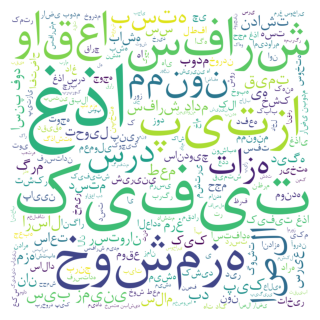

In [5]:
comment_words = " ".join(df['comment'])

wordcloud = WordCloud(font_path= "B-NAZANIN.TTF", width = 800, height = 800, 
                      background_color ='white',stopwords=stopwords_list(),
                      min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (3, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### 2- as you see the apearance is awkward make fun with wordcloud-fa to rebuild it in better persian appearance

In [ ]:
!pip install wordcloud-fa

In [6]:
from wordcloud_fa import WordCloudFa

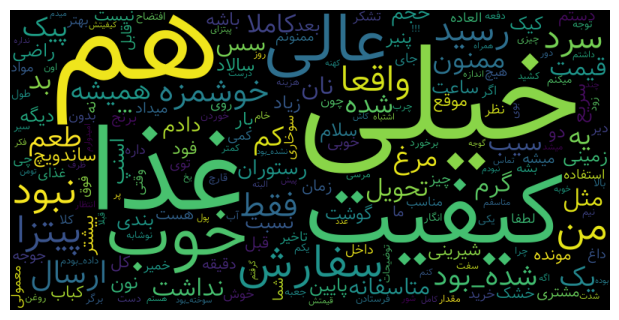

In [7]:
wodcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)
wc = wodcloud.generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### another library is persian_wordcloud you can use it for combined persian and english words#### 
 

#### 3- make a regex pattern tha match only \etc\cat22 not( \etdc\cat22 or \etc\cat22f)

In [ ]:
\\etc\\cat\d+\b

#### 4- what does ematizer and  tager do ?

#### 5- what is the difrence of these (regex)

#### [^0-9-]

#### [\D-]

In [ ]:
در اولی هر چیزی غیر از اعداد 0 تا 9 و - باشد مچ می کند

در دومی هر چیزی غیر از عدد را مچ می کند

در واقع این دو تا رجکس شبیه هم هستند فقط در اولی - را نمی گیرد ولی در دومی - را میگیرد

## from class question
#### 6- make a regex for iran mobile numbers explain each part of it

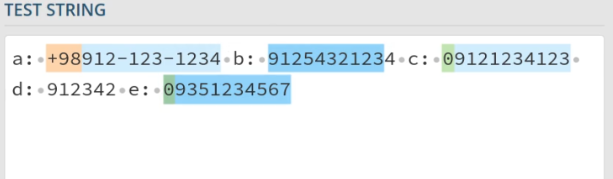

In [ ]:
(\+98|0)?9\d{2}-?\d{3}-?\d{4}\b

In [ ]:
در این رجکس اول +98 یا 0 را می گیرد یا هیچ کدام سپس حتما عدد 9 داشته باشد و در ادامه - می تواند داشته باشد یا خیر و 7 عدد دقیقا

## review 
#### 7- read company_sales_data.csv with pandas

#### add "profit" as x label and "Month number" as y label "company profit" as title

#### ach month_number should show in x axis 

#### make it orange

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('company_sales_data.csv')
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


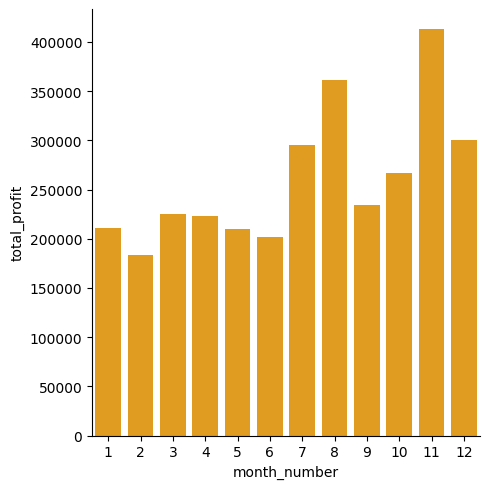

In [22]:
sns.catplot(y='total_profit',x='month_number',kind='bar', data=df, color='orange')

#### 8- make the plaot with bokeh like titanic.html file
#### x axis is age y axis is survived and bolding of circles are according to Fare 

#### when you hover each circle it should show some extra informations 

In [ ]:
pip install bokeh

In [43]:
from bokeh.io import curdoc, show

In [44]:
from bokeh.models import HoverTool

In [45]:
from bokeh.models import Circle, ColumnDataSource, Grid, LinearAxis, Plot

In [ ]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df.head()

In [107]:
x = titanic_df['Age']
y=titanic_df['Survived']
sizes = titanic_df['Fare']

source = ColumnDataSource(dict(x=x, y=y, sizes=sizes))

plot = Plot(
    title=None, width=1500, height=600,
    min_border=0, toolbar_location=None)

TOOLS = "box_select,lasso_select,hover,help"

glyph = Circle(x="x", y="y", size="sizes", line_color="#3288bd", fill_color="blue", line_width=3)

In [108]:
plot.add_glyph(source, glyph)

xaxis = LinearAxis()
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis()
plot.add_layout(yaxis, 'left')

plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

curdoc().add_root(plot)

hover = HoverTool()
hover.tooltips=[
    ("Age", "@x"),
    ("Survived", "@y"),
    ("Fare", "@sizes")
]

plot.add_tools(hover)

show(plot)